# EXTRACTION

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plot

In [2]:
df = pd.read_csv(r"D:\EDUCATIONAL MATERIALS\POST GRAD\datasets\telco customer churn dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
for column in df.columns:
    if column not in ["customerID", "tenure", "MonthlyCharges", "TotalCharges"]:
        print(column, ": ", df[column].unique())

gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :  ['No' 'Yes']


# TRANSFORMATION

#### transformations:
- gender: Female -> 0 | Male -> 1
- SeniorCitizen: already in numerical value
- Partner: No -> 0 | Yes -> 1
- Dependents: No -> 0 | Yes -> 1
- PhoneService: No -> 0 | Yes -> 1
- MultipleLines: No -> 0 | Yes -> 1 | No Phone Service -> 2
- InternetService: No -> 0 | DSL -> 1 | Fiber optic -> 2
- OnlineSecurity: No -> 0 | Yes -> 1 | No Internet Service -> 2
- OnlineBackup: No -> 0 | Yes -> 1 | No Internet Service -> 2
- DeviceProtection: No -> 0 | Yes -> 1 | No Internet Service -> 2
- TechSupport: No -> 0 | Yes -> 1 | No Internet Service -> 2
- StreamingTV: No -> 0 | Yes -> 1 | No Internet Service -> 2
- StreamingMovies: No -> 0 | Yes -> 1 | No Internet Service -> 2
- Contract: Month-to-month -> 0 | One year -> 1 | Two year -> 2
- PaperlessBilling: No -> 0 | Yes -> 1
- PaymentMethod: Electronic check -> 0 | Mailed check -> 1 | Bank transfer (automatic) -> 2 | Credit card (automatic) -> 3
- Churn: No -> 0 | Yes -> 1

In [6]:
df["gender"] = df["gender"].replace({"Female":0, "Male":1})

C:\Users\Arcel Ozaeda Dizon\AppData\Local\Temp\ipykernel_8044\1423463213.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["gender"] = df["gender"].replace({"Female":0, "Male":1})


In [7]:
df["Partner"] = df["Partner"].replace({"No":0, "Yes":1})

C:\Users\Arcel Ozaeda Dizon\AppData\Local\Temp\ipykernel_8044\4087308385.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Partner"] = df["Partner"].replace({"No":0, "Yes":1})


In [8]:
df["Dependents"] = df["Dependents"].replace({"No":0, "Yes":1})

C:\Users\Arcel Ozaeda Dizon\AppData\Local\Temp\ipykernel_8044\704575769.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Dependents"] = df["Dependents"].replace({"No":0, "Yes":1})


In [9]:
df["PhoneService"] = df["PhoneService"].replace({"No":0, "Yes":1})

C:\Users\Arcel Ozaeda Dizon\AppData\Local\Temp\ipykernel_8044\868297481.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["PhoneService"] = df["PhoneService"].replace({"No":0, "Yes":1})


In [10]:
df["MultipleLines"] = df["MultipleLines"].replace({"No":0, "Yes":1, "No phone service":2})

C:\Users\Arcel Ozaeda Dizon\AppData\Local\Temp\ipykernel_8044\3387131232.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["MultipleLines"] = df["MultipleLines"].replace({"No":0, "Yes":1, "No phone service":2})


In [11]:
df["InternetService"] = df["InternetService"].replace({"No":0, "DSL":1, "Fiber optic":2})

C:\Users\Arcel Ozaeda Dizon\AppData\Local\Temp\ipykernel_8044\1882983790.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["InternetService"] = df["InternetService"].replace({"No":0, "DSL":1, "Fiber optic":2})


In [12]:
df["OnlineSecurity"] = df["OnlineSecurity"].replace({"No":0, "Yes":1, "No internet service":2})

C:\Users\Arcel Ozaeda Dizon\AppData\Local\Temp\ipykernel_8044\2225393935.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["OnlineSecurity"] = df["OnlineSecurity"].replace({"No":0, "Yes":1, "No internet service":2})


In [13]:
df["OnlineBackup"] = df["OnlineBackup"].replace({"No":0, "Yes":1, "No internet service":2})

C:\Users\Arcel Ozaeda Dizon\AppData\Local\Temp\ipykernel_8044\1364465194.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["OnlineBackup"] = df["OnlineBackup"].replace({"No":0, "Yes":1, "No internet service":2})


In [14]:
df["DeviceProtection"] = df["DeviceProtection"].replace({"No":0, "Yes":1, "No internet service":2})

C:\Users\Arcel Ozaeda Dizon\AppData\Local\Temp\ipykernel_8044\450209387.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["DeviceProtection"] = df["DeviceProtection"].replace({"No":0, "Yes":1, "No internet service":2})


In [15]:
df["TechSupport"] = df["TechSupport"].replace({"No":0, "Yes":1, "No internet service":2})

C:\Users\Arcel Ozaeda Dizon\AppData\Local\Temp\ipykernel_8044\3355055009.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["TechSupport"] = df["TechSupport"].replace({"No":0, "Yes":1, "No internet service":2})


In [16]:
df["StreamingTV"] = df["StreamingTV"].replace({"No":0, "Yes":1, "No internet service":2})

C:\Users\Arcel Ozaeda Dizon\AppData\Local\Temp\ipykernel_8044\1089520469.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["StreamingTV"] = df["StreamingTV"].replace({"No":0, "Yes":1, "No internet service":2})


In [17]:
df["StreamingMovies"] = df["StreamingMovies"].replace({"No":0, "Yes":1, "No internet service":2})

C:\Users\Arcel Ozaeda Dizon\AppData\Local\Temp\ipykernel_8044\4095378430.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["StreamingMovies"] = df["StreamingMovies"].replace({"No":0, "Yes":1, "No internet service":2})


In [18]:
df["Contract"] = df["Contract"].replace({"Month-to-month":0, "One year":1, "Two year":2})

C:\Users\Arcel Ozaeda Dizon\AppData\Local\Temp\ipykernel_8044\3121951539.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Contract"] = df["Contract"].replace({"Month-to-month":0, "One year":1, "Two year":2})


In [19]:
df["PaperlessBilling"] = df["PaperlessBilling"].replace({"No":0, "Yes":1})

C:\Users\Arcel Ozaeda Dizon\AppData\Local\Temp\ipykernel_8044\1637895844.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["PaperlessBilling"] = df["PaperlessBilling"].replace({"No":0, "Yes":1})


In [20]:
df["PaymentMethod"] = df["PaymentMethod"].replace({"Electronic check":0, "Mailed check":1, "Bank transfer (automatic)":2, "Credit card (automatic)":3})

C:\Users\Arcel Ozaeda Dizon\AppData\Local\Temp\ipykernel_8044\1459303995.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["PaymentMethod"] = df["PaymentMethod"].replace({"Electronic check":0, "Mailed check":1, "Bank transfer (automatic)":2, "Credit card (automatic)":3})


In [21]:
df["Churn"] = df["Churn"].replace({"No":0, "Yes":1})

C:\Users\Arcel Ozaeda Dizon\AppData\Local\Temp\ipykernel_8044\142656858.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"No":0, "Yes":1})


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [23]:
df["TotalCharges"] = df["TotalCharges"].str.strip()

In [24]:
df["TotalCharges"] = df["TotalCharges"].replace("", np.nan)

In [25]:
df.query("TotalCharges.isna()")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,0,0,1,1,0,0,2,1,1,...,1,1,1,0,2,1,2,52.55,NaN,0
753,3115-CZMZD,1,0,0,1,0,1,0,0,2,...,2,2,2,2,2,0,1,20.25,NaN,0
936,5709-LVOEQ,0,0,1,1,0,1,0,1,1,...,1,0,1,1,2,0,1,80.85,NaN,0
1082,4367-NUYAO,1,0,1,1,0,1,1,0,2,...,2,2,2,2,2,0,1,25.75,NaN,0
1340,1371-DWPAZ,0,0,1,1,0,0,2,1,1,...,1,1,1,0,2,0,3,56.05,NaN,0
3331,7644-OMVMY,1,0,1,1,0,1,0,0,2,...,2,2,2,2,2,0,1,19.85,NaN,0
3826,3213-VVOLG,1,0,1,1,0,1,1,0,2,...,2,2,2,2,2,0,1,25.35,NaN,0
4380,2520-SGTTA,0,0,1,1,0,1,0,0,2,...,2,2,2,2,2,0,1,20.00,NaN,0
5218,2923-ARZLG,1,0,1,1,0,1,0,0,2,...,2,2,2,2,1,1,1,19.70,NaN,0
6670,4075-WKNIU,0,0,1,1,0,1,1,1,0,...,1,1,1,0,2,0,1,73.35,NaN,0


In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1


- dont know how the total charges is calculated. drop the records instead since its only few 11 records

In [27]:
df = df.dropna()

In [28]:
df.astype({"TotalCharges":"float64"})

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,1,...,1,1,1,1,1,1,1,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,1,2,0,...,1,0,1,1,1,1,3,103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,2,1,1,...,0,0,0,0,0,1,0,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,1,2,0,...,0,0,0,0,0,1,1,74.40,306.60,1


In [29]:
df.query("Churn == 1").shape

(1869, 21)

In [30]:
df.query("Churn == 0").shape

(5163, 21)

- data classes are severly imbalanced, only 1869 (\~26%) is churn and 5163 (\~74%) is not churn
- balance classes by undersampling the majority class 

In [31]:
df_positive_class = df.query("Churn == 1")

In [32]:
df_negative_class = df.query("Churn == 0").sample(n=1869, random_state=1)

In [33]:
df_balanced = pd.concat([df_positive_class, df_negative_class], ignore_index=True).sample(frac=1, random_state=1)

# LOADING

In [34]:
df_balanced.to_csv("preprocessed.csv", index=False)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(df_balanced.drop(columns=["Churn", "customerID"]).values, df_balanced["Churn"].values, test_size=0.2, random_state=1)

In [36]:
models = {}

In [37]:
scores = {}

## logistic regression model

In [38]:
models["logistic regression"] = LogisticRegression(max_iter=10000)

In [39]:
models["logistic regression"].fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [40]:
models["logistic regression"].coef_

array([[-1.97904640e-01,  1.70204408e-01,  1.15619360e-01,
        -2.45012440e-01, -6.07664955e-02,  7.85692101e-03,
         2.10501469e-01,  9.40744425e-01, -3.20514014e-01,
        -8.97115755e-02, -2.24572827e-02, -3.08392172e-01,
         3.27133573e-01,  3.30840188e-01, -7.89911976e-01,
         3.90978581e-01, -1.22093441e-01, -8.78789312e-03,
         3.52617826e-04]])

In [41]:
models["logistic regression"].intercept_

array([0.24612979])

In [42]:
y_pred = models["logistic regression"].predict(x_test)

In [43]:
scores["logistic regression"] = accuracy_score(y_test, y_pred)

## decision tree model

In [44]:
models["decision tree"] = DecisionTreeClassifier()

In [45]:
models["decision tree"].fit(x_train, y_train)

DecisionTreeClassifier()

In [46]:
y_pred = models["decision tree"].predict(x_test)

In [47]:
scores["decision tree"] = accuracy_score(y_test, y_pred)

## random forest model

In [48]:
models["random forest"] = RandomForestClassifier()

In [49]:
models["random forest"].fit(x_train, y_train)

RandomForestClassifier()

In [50]:
y_pred = models["random forest"].predict(x_test)

In [51]:
scores["random forest"] = accuracy_score(y_test, y_pred)

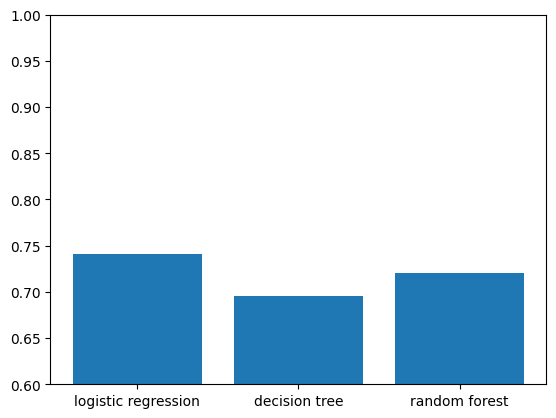

In [52]:
plot.bar(list(models.keys()), list(scores.values()))
plot.ylim([0.6, 1])
plot.show()